# Frequency Bias Experiments


In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import glob

def plot_bar_mse(apkl, title="", **kwargs):
    mse = [np.sum((apkl["baseline_sample"] - x) ** 2) / np.prod(apkl["baseline_sample"].shape[1:]) for x in apkl["Xsamples"]]
    ticks = [str(apkl["percent_range"][i-1]) + "-" + str(apkl["percent_range"][i]) for i in range(1, len(apkl["percent_range"]))]
    plt.title(title)
    plt.xlabel("Frequency Removed")
    plt.ylabel("MSE")
    plt.bar(range(len(mse)), mse, [1] * len(mse), align="center", edgecolor="black", linewidth=1)
    plt.xticks(ticks=range(len(mse)), labels=ticks, rotation=45)
    
def plot_bar_imp(apkl, title="", **kwargs):
    rel_importance = [apkl["baseline_acc"] - x for x in apkl["removed_acc"]]
    bar_width = [apkl["percent_range"][i + 1] - apkl["percent_range"][i] for i in range(len(apkl["percent_range"]) - 1)]
    plt.title(title)
    plt.xlabel("Frequency Removed")
    plt.ylabel("Importance")
    plt.bar(apkl["percent_range"][:-1], rel_importance, bar_width, align="edge", edgecolor="black", linewidth=1)
    
def plot_all_bar_imp(apkl, label, apkl_1, label_1, apkl_2, label_2):
    plt.xlabel("Frequency Removed")
    plt.ylabel("Decrease in Accuracy")

    rel_importance = [apkl["baseline_acc"] - x for x in apkl["removed_acc"]]
    ticks = [str(apkl["percent_range"][i-1]) + "-" + str(apkl["percent_range"][i]) for i in range(1, len(apkl["percent_range"]))]
    plt.bar(np.array(range(len(rel_importance))) - 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label)

    rel_importance = [apkl_1["baseline_acc"] - x for x in apkl_1["removed_acc"]]
    plt.bar(np.array(range(len(rel_importance))) + 0., rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_1)

    rel_importance = [apkl_2["baseline_acc"] - x for x in apkl_2["removed_acc"]]
    plt.bar(np.array(range(len(rel_importance))) + 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_2)

    plt.xticks(ticks=range(len(rel_importance)), labels=ticks, rotation=45)
    plt.legend()
    
def plot_all_bar_2imp(apkl, label, apkl_1, label_1):
    plt.xlabel("Frequency Removed")
    plt.ylabel("Decrease in Accuracy")

    rel_importance = [apkl["baseline_acc"] - x for x in apkl["removed_acc"]]
    ticks = [str(apkl["percent_range"][i-1]) + "-" + str(apkl["percent_range"][i]) for i in range(1, len(apkl["percent_range"]))]
    plt.bar(np.array(range(len(rel_importance))) - 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label)

    rel_importance = [apkl_1["baseline_acc"] - x for x in apkl_1["removed_acc"]]
    plt.bar(np.array(range(len(rel_importance))) + 0., rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_1)
    
def imp_per_mse(apkl, examples):
    mse = [np.sum((examples["baseline_sample"] - x) ** 2) / np.prod(examples["baseline_sample"].shape[1:]) for x in examples["Xsamples"]]
    return (apkl["baseline_acc"] - np.array(apkl["removed_acc"])) / mse
    
    
def plot_all_bar_impmse_ratio(apkl, examples, label, apkl_1, examples_1, label_1, apkl_2, examples_2, label_2):
    plt.xlabel("Frequency Removed")
    plt.ylabel("Decrease per MSE")
    
    rel_importance = imp_per_mse(apkl, examples)
    ticks = [str(apkl["percent_range"][i-1]) + "-" + str(apkl["percent_range"][i]) for i in range(1, len(apkl["percent_range"]))]
    plt.bar(np.array(range(len(rel_importance))) - 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label)

    rel_importance = imp_per_mse(apkl_1, examples_1)
    plt.bar(np.array(range(len(rel_importance))) + 0., rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_1)

    rel_importance = imp_per_mse(apkl_2, examples_2)
    plt.bar(np.array(range(len(rel_importance))) + 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_2)
    plt.xticks(ticks=range(len(rel_importance)), labels=ticks, rotation=45)
    plt.legend()
    
def plot_all_bar_2impmse_ratio(apkl, examples, label, apkl_1, examples_1, label_1):
    plt.xlabel("Frequency Removed")
    plt.ylabel("Decrease per MSE")
    
    rel_importance = imp_per_mse(apkl, examples)
    ticks = [str(apkl["percent_range"][i-1]) + "-" + str(apkl["percent_range"][i]) for i in range(1, len(apkl["percent_range"]))]
    plt.bar(np.array(range(len(rel_importance))) - 0.25, rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label)

    rel_importance = imp_per_mse(apkl_1, examples_1)
    plt.bar(np.array(range(len(rel_importance))) + 0., rel_importance, [0.25] * len(rel_importance), align="center", edgecolor="black", linewidth=1, label=label_1)

    

def plot_graph_mda(apkl, title="", **kwargs):
    removed_acc = apkl["removed_acc"]
    percent_range = apkl["percent_range"]
    baseline_acc = apkl["baseline_acc"]
    
    plt.ylabel("Accuracy")
    plt.xlabel("Removed Band (not in scale)")
    plot = plt.plot(range(len(removed_acc)), removed_acc, **kwargs)
    colorplot = plot[0].get_color()
    plt.plot(range(len(removed_acc)), [baseline_acc] * len(removed_acc), color=colorplot, label="Baseline " + kwargs["label"])
    _ = plt.xticks(ticks=range(len(removed_acc)), labels=["-".join([str(percent_range[i]), str(percent_range[i + 1])]) for i in range(len(percent_range) -1)])
    
def plot_examples(apkl, width, base_height, ex1, ex2, ex3):
    base_sample = apkl["baseline_sample"]
    base_sample = np.maximum(base_sample, 0)
    base_sample = np.minimum(base_sample, 1)
    Xsamples = apkl["Xsamples"]
    Xsamples = np.maximum(Xsamples, 0)
    Xsamples = np.minimum(Xsamples, 1)
    percent_range = apkl["percent_range"]

    height = base_height * (len(Xsamples) + 1)
    num_figs = 3 * (len(Xsamples) + 1)
    plt.figure(figsize=(width, height))
    plt.subplot(num_figs, 3, 1)
    plt.axis("off")
    plt.title("Original")
    plt.imshow(base_sample[ex1])
    plt.subplot(num_figs, 3, 2)
    plt.axis("off")
    plt.title("Original")
    plt.imshow(base_sample[ex2])
    plt.subplot(num_figs, 3, 3)
    plt.axis("off")
    plt.title("Original")
    plt.imshow(base_sample[ex3])

    for i in range(len(Xsamples) - 3):
        base = 3 * (i + 1)
        plt.subplot(num_figs, 3, base + 1)
        plt.axis("off")
        plt.title("Removed (%d-%d]" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex1])
        
        plt.subplot(num_figs, 3, base + 2)
        plt.axis("off")
        plt.title("Removed (%d-%d]" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex2])
    
        plt.subplot(num_figs, 3, base + 3)
        plt.axis("off")
        plt.title("Removed (%d-%d]" % (percent_range[i], percent_range[i + 1]))
        plt.imshow(Xsamples[i][ex3])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RestrictedImageNet

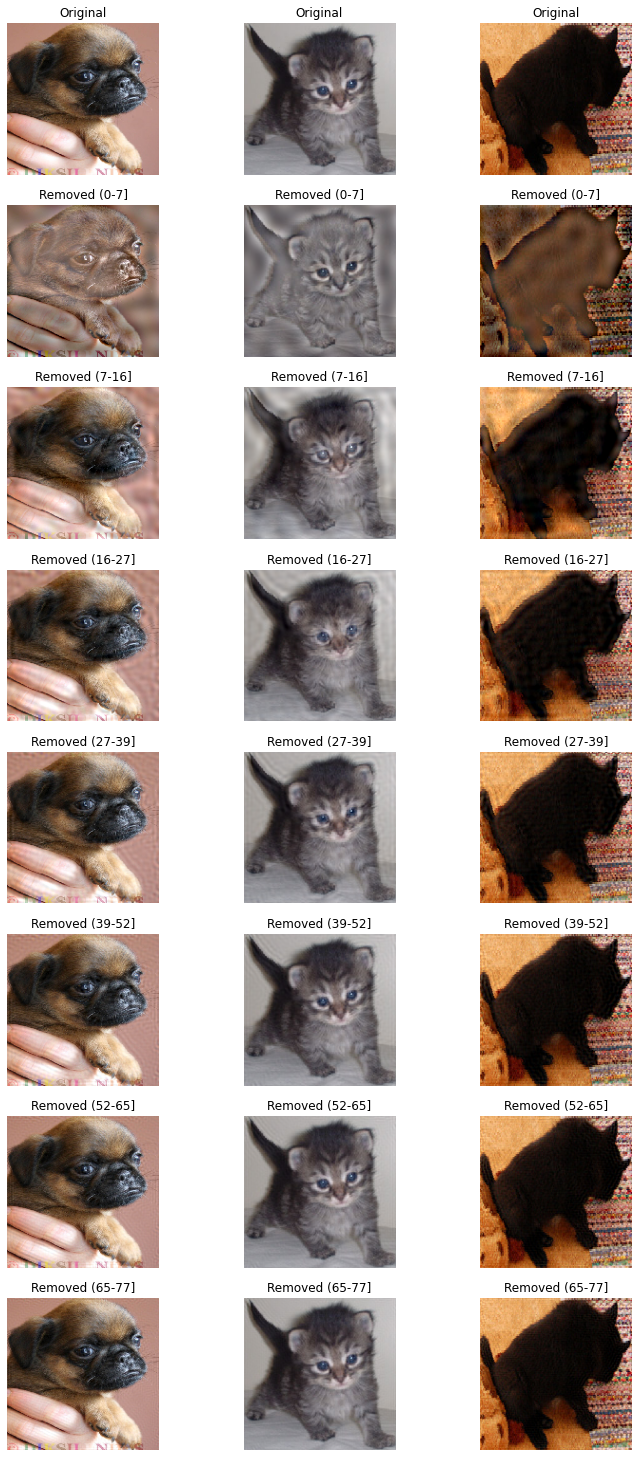

In [25]:
rin_examples = pkl.load(open("RestrictedImageNet_EXAMPLES.pkl", "rb"))
plot_examples(rin_examples, 12, 10, 0, 5, 7)

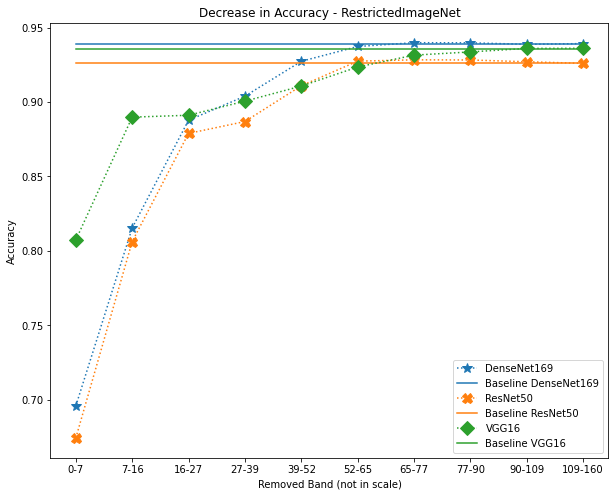

In [3]:
densenet_rin = pkl.load(open("2020-11-10_RestrictedImageNet_64DenseNet169_MDA.pkl", "rb"))
resnet_rin = pkl.load(open("2020-09-13_RestrictedImageNet_ResNet50_MDA.pkl", "rb"))
vgg16_rin = pkl.load(open('2020-09-14_RestrictedImageNet_64VGG16_MDA.pkl', 'rb'))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - RestrictedImageNet")
plot_graph_mda(densenet_rin, label="DenseNet169", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_rin, label="ResNet50", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_rin, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

## VGGFace2

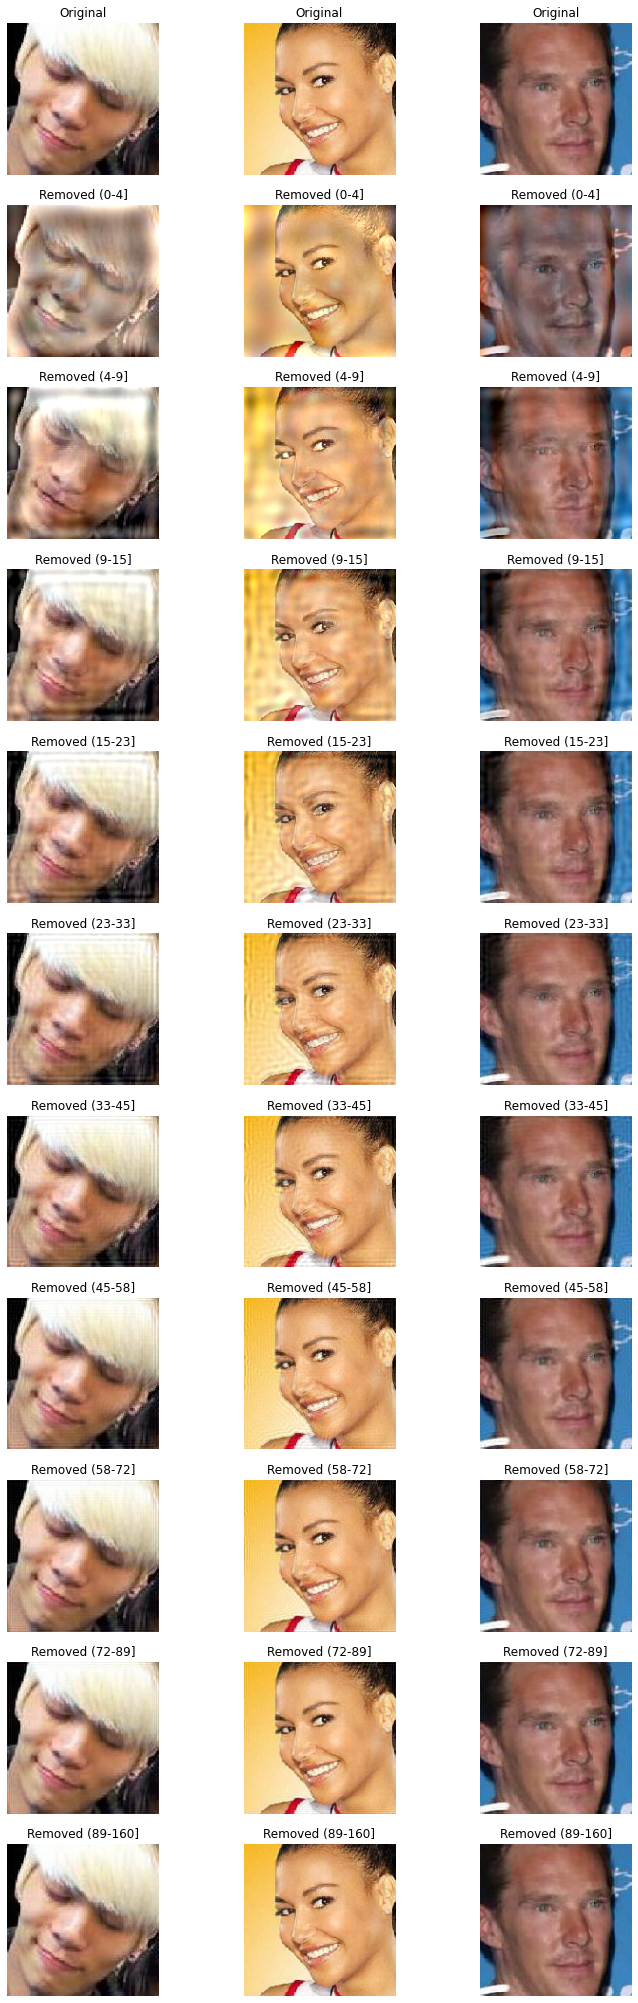

In [4]:
vgg_examples = pkl.load(open("VGGFace2_EXAMPLES.pkl","rb"))
plot_examples(vgg_examples, 12, 10, 0, 1, 7)

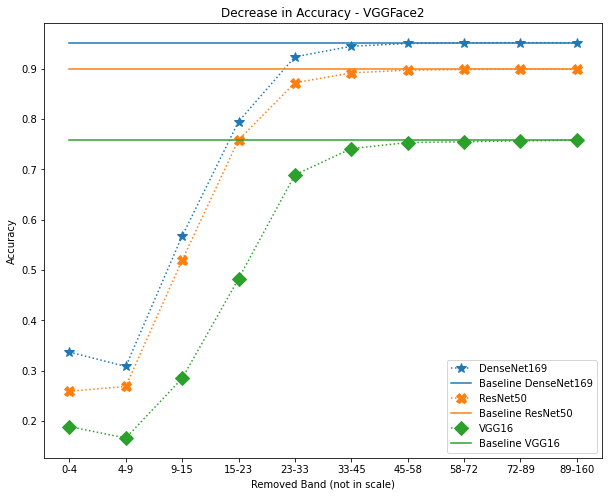

In [5]:
densenet_vggface = pkl.load(open("2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl", "rb"))
resnet_vggface = pkl.load(open("2020-09-20_VGGFace2_64ResNet50_10_MDA.pkl", "rb"))
vgg16_vggface = pkl.load(open('2020-11-23_VGGFace2_64VGG16_3_MDA.pkl', "rb"))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - VGGFace2")
plot_graph_mda(densenet_vggface, label="DenseNet169", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_vggface, label="ResNet50", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_vggface, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

## CIFAR10

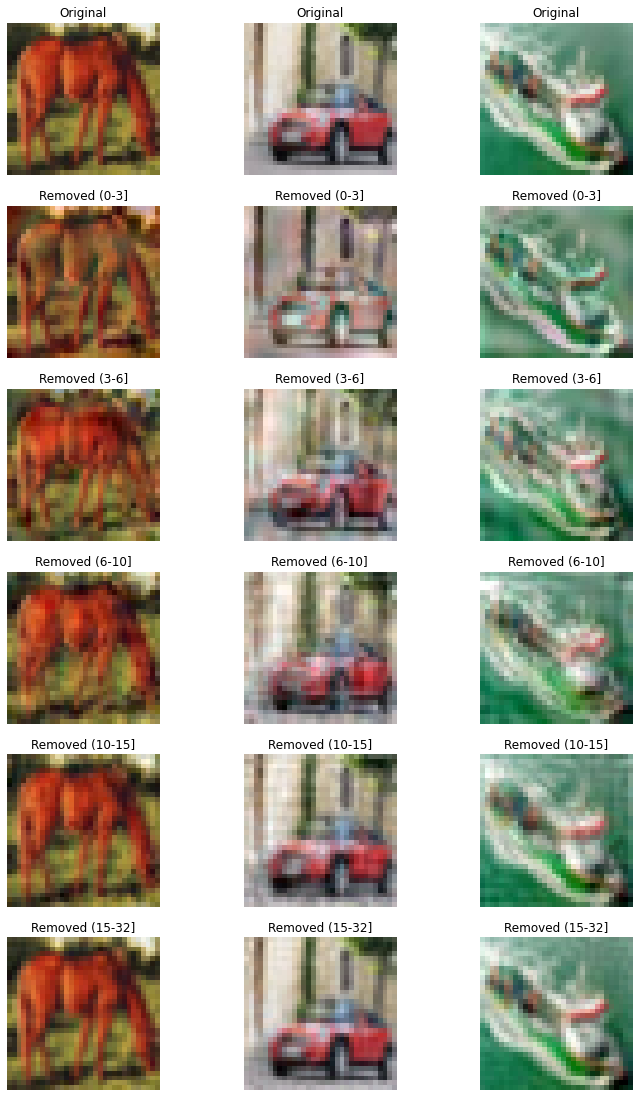

In [6]:
cifar_examples = pkl.load(open("CIFAR10_EXAMPLES.pkl", "rb"))
plot_examples(cifar_examples, 12, 10, 1, 5, 6)

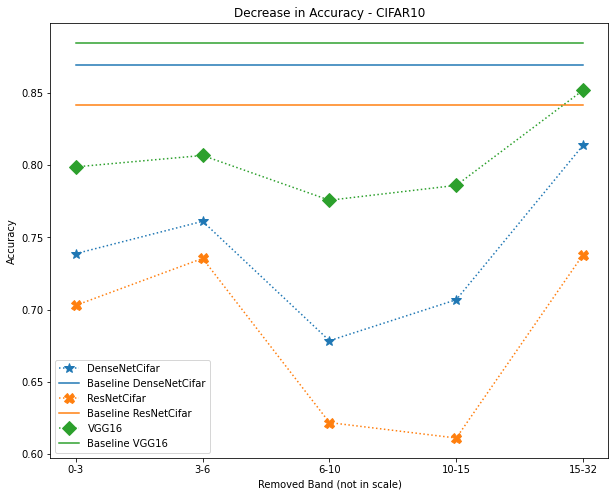

In [7]:
densenet_cifar_norm = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128DenseNetCifar_MDA.pkl', 'rb'))
resnet_cifar_norm = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128CifarResNet_MDA.pkl', 'rb'))
vgg16_cifar_norm = pkl.load(open( '2020-11-23_CIFAR10NORMALIZED_128VGG16_MDA.pkl', 'rb'))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - CIFAR10")
plot_graph_mda(densenet_cifar_norm, label="DenseNetCifar", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_cifar_norm, label="ResNetCifar", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg16_cifar_norm, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

# SVHN 

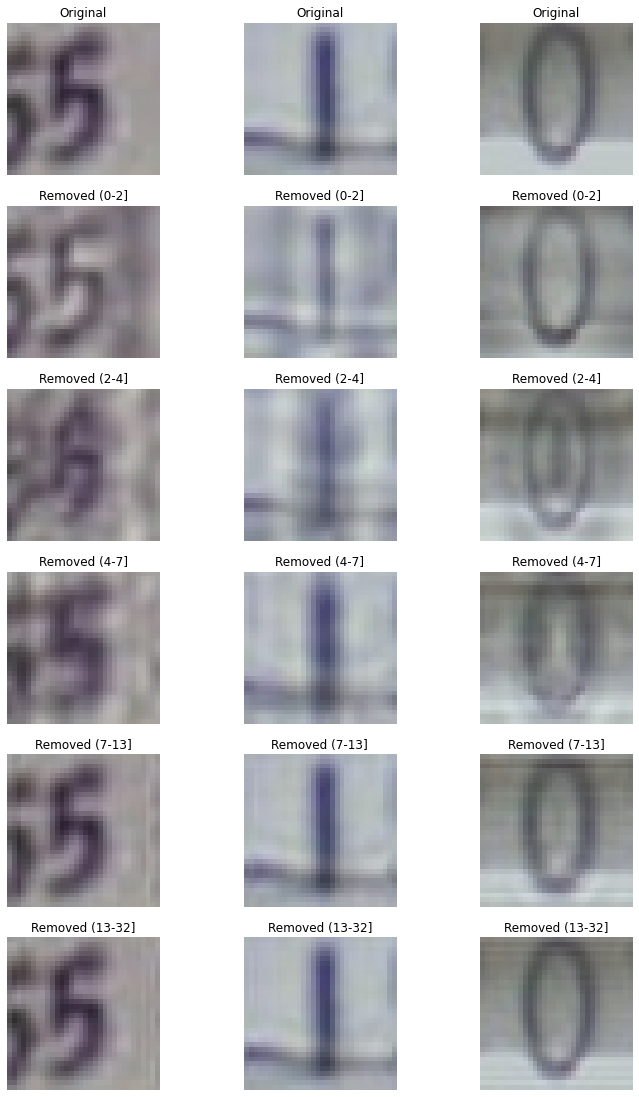

In [23]:
svhn_examples = pkl.load(open("SVHN_EXAMPLES.pkl", "rb"))
plot_examples(svhn_examples, 12, 10, 0, 1, 3)

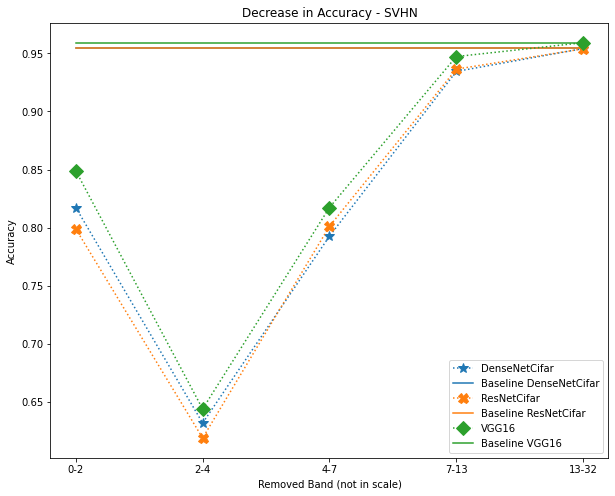

In [9]:
densenet_svhn = pkl.load(open("2021-01-11_SVHNNORMALIZED_128DenseNetCifar_MDA.pkl", "rb"))
vgg_svhn = pkl.load(open("2021-01-11_SVHNNORMALIZED_128VGG16_MDA.pkl", "rb"))
resnet_svhn = pkl.load(open("2021-01-12_SVHNNORMALIZED_128CifarResNet_MDA.pkl", "rb"))

plt.figure(figsize=(10, 8))
plt.title("Decrease in Accuracy - SVHN")
plot_graph_mda(densenet_svhn, label="DenseNetCifar", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(resnet_svhn, label="ResNetCifar", linestyle="dotted", marker="X", markersize=10)
plot_graph_mda(vgg_svhn, label="VGG16", linestyle="dotted", marker="D", markersize=10)
plt.legend()

### Outra visualização possível
Para demonstrar o ponto, comparar com MSE

"Importancia" = Baseline - Acc de frequencia removida

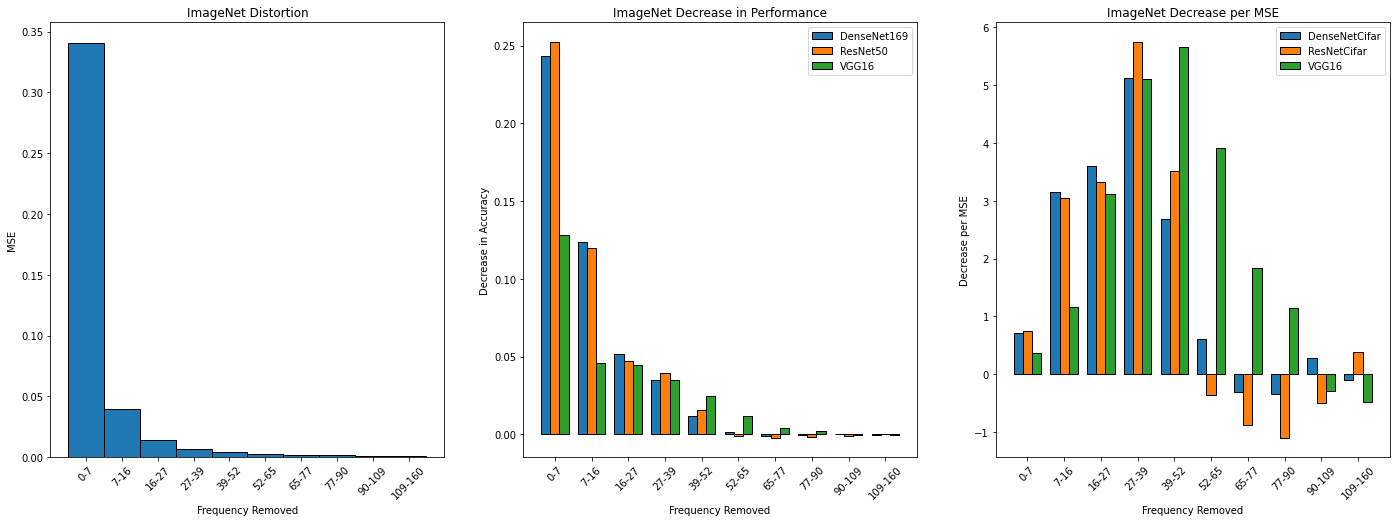

In [10]:
# rin
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_bar_mse(rin_examples, title="ImageNet Distortion")
plt.subplot(1, 3, 2)
plt.title("ImageNet Decrease in Performance")
plot_all_bar_imp(densenet_rin, "DenseNet169", resnet_rin, "ResNet50", vgg16_rin, "VGG16")
plt.subplot(1, 3, 3)
plt.title("ImageNet Decrease per MSE")
plot_all_bar_impmse_ratio(densenet_rin, rin_examples, "DenseNetCifar", resnet_rin, rin_examples, "ResNetCifar", vgg16_rin, rin_examples, "VGG16",)

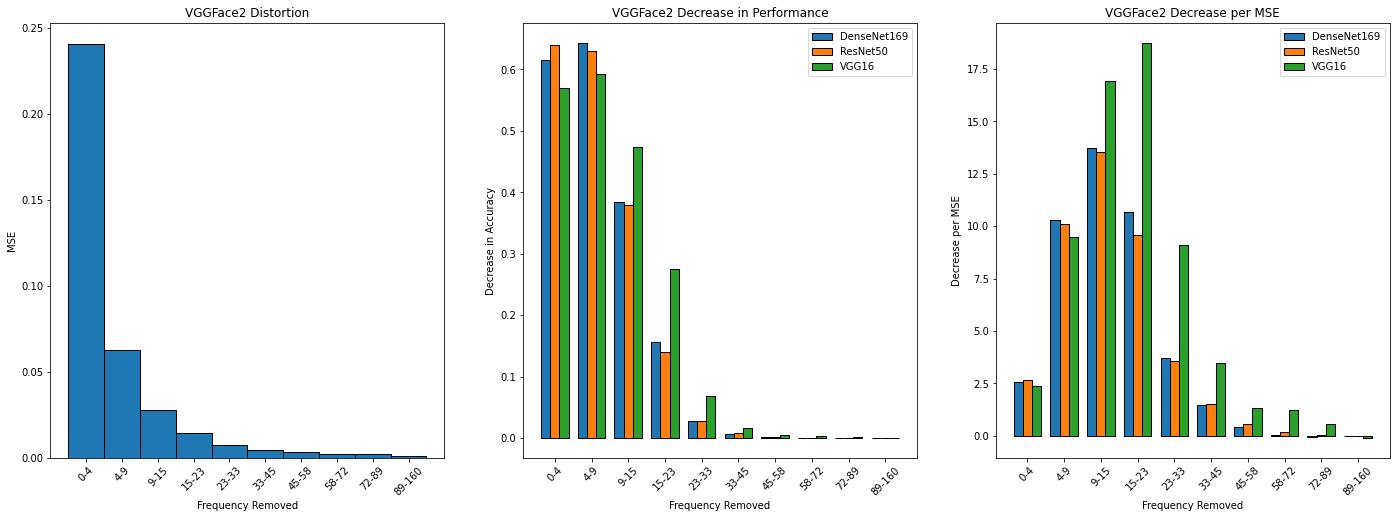

In [11]:
# vggface
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_bar_mse(vgg_examples, title="VGGFace2 Distortion")
plt.subplot(1, 3, 2)
plt.title("VGGFace2 Decrease in Performance")
plot_all_bar_imp(densenet_vggface, "DenseNet169",resnet_vggface, "ResNet50", vgg16_vggface, "VGG16")
plt.subplot(1, 3, 3)
plt.title("VGGFace2 Decrease per MSE")
plot_all_bar_impmse_ratio(densenet_vggface, vgg_examples, "DenseNet169", resnet_vggface, vgg_examples, "ResNet50", vgg16_vggface, vgg_examples, "VGG16")

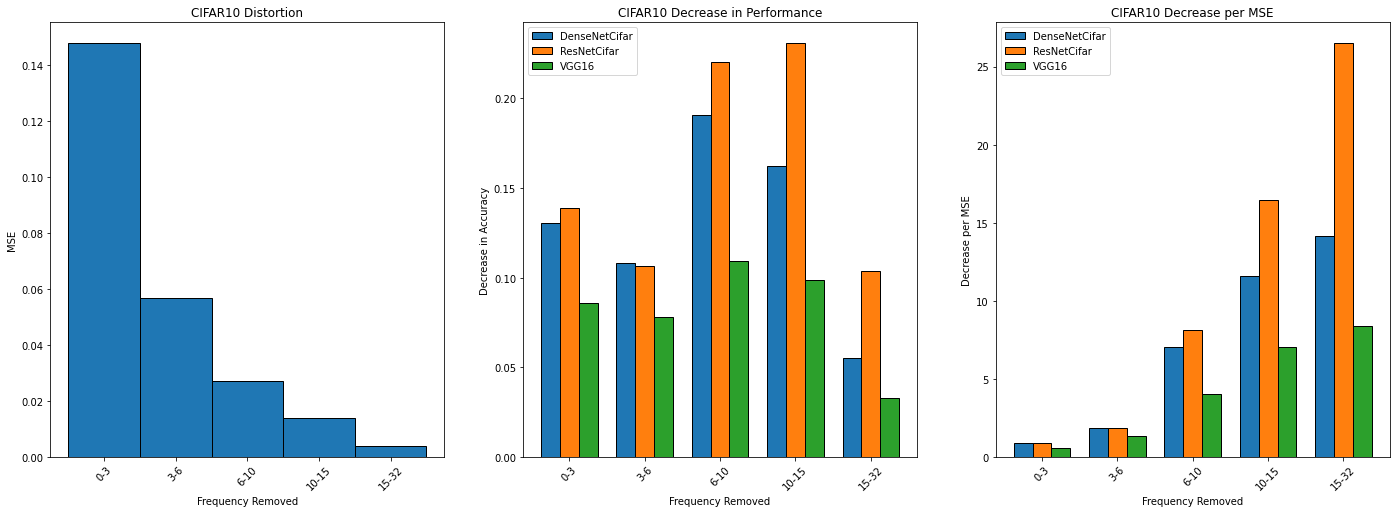

In [12]:
# cifar
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_bar_mse(cifar_examples, title="CIFAR10 Distortion")
plt.subplot(1, 3, 2)
plt.title("CIFAR10 Decrease in Performance")
plot_all_bar_imp(densenet_cifar_norm, "DenseNetCifar", resnet_cifar_norm, "ResNetCifar" , vgg16_cifar_norm, "VGG16",)
plt.subplot(1, 3, 3)
plt.title("CIFAR10 Decrease per MSE")
plot_all_bar_impmse_ratio(densenet_cifar_norm, cifar_examples, "DenseNetCifar", resnet_cifar_norm, cifar_examples, "ResNetCifar", vgg16_cifar_norm, cifar_examples, "VGG16")

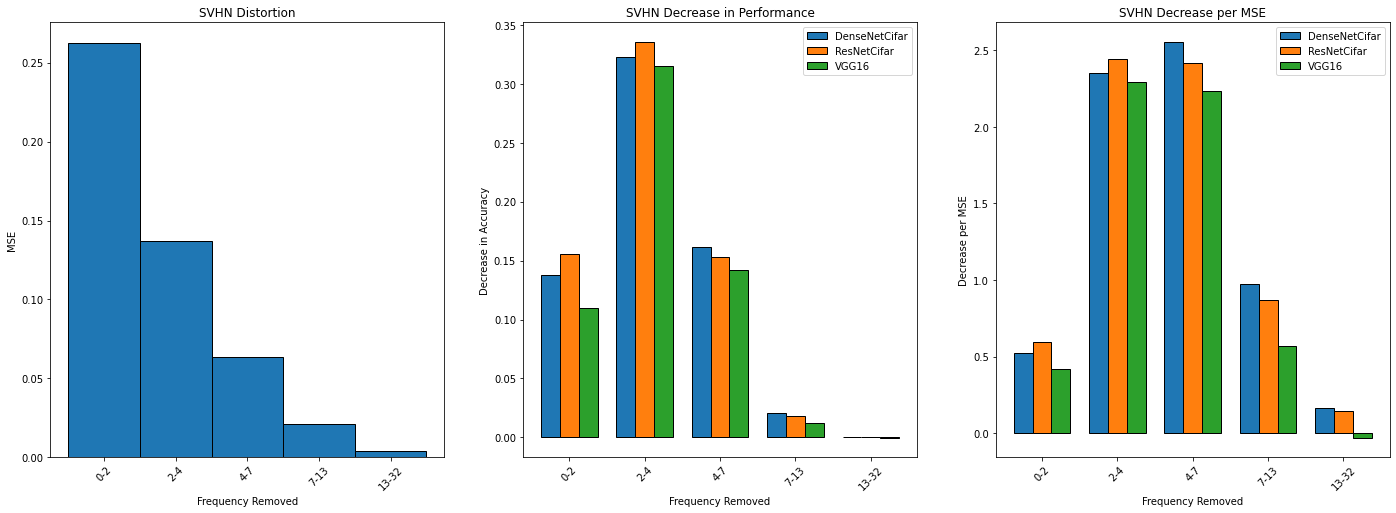

In [13]:
# svhn
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plot_bar_mse(svhn_examples, title="SVHN Distortion")
plt.subplot(1, 3, 2)
plt.title("SVHN Decrease in Performance")
plot_all_bar_imp(densenet_svhn, "DenseNetCifar", resnet_svhn, "ResNetCifar",  vgg_svhn, "VGG16",)
plt.subplot(1, 3, 3)
plt.title("SVHN Decrease per MSE")
plot_all_bar_impmse_ratio(densenet_svhn, svhn_examples, "DenseNetCifar", resnet_svhn, svhn_examples, "ResNetCifar",  vgg_svhn, svhn_examples, "VGG16")

## Outros Experimentos

### Normalização - Sem Normalização
Normalização (dividir cada imagem por sua média e dividir por seu desvio padrão) é um preprocessamento comum. Usamos em todos os experimentos. Como o CIFAR10 é um dataset particularmente fácil podemos abrir mão dos ganhos, mas acabamos descobrindo que sem a normalização as redes tenderam a ir melhor nesse dataset (verificar se é sempre o caso)

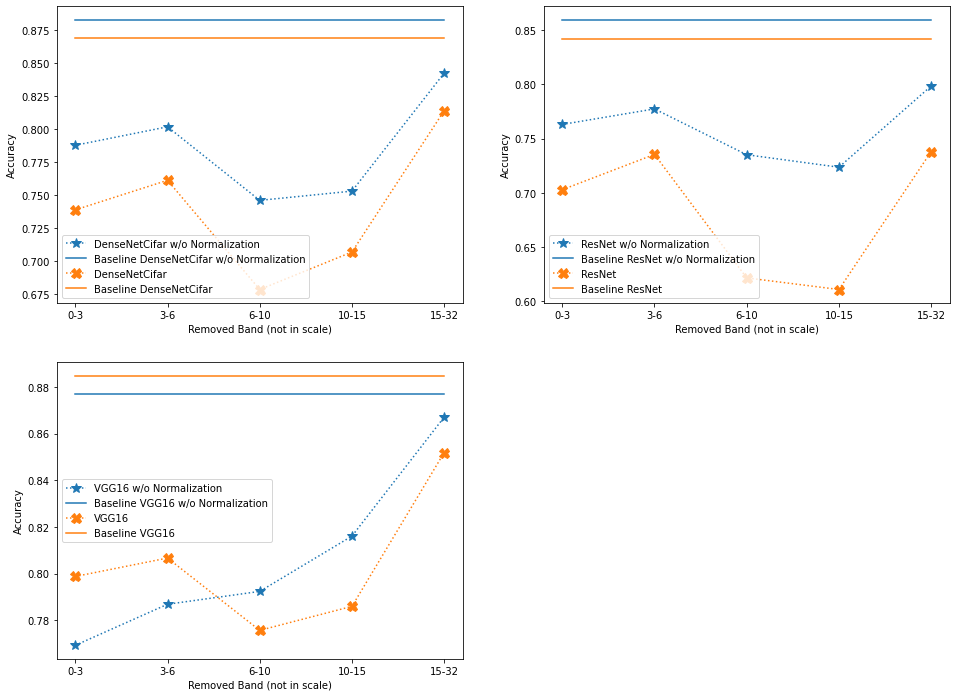

In [14]:
densenet_cifar = pkl.load(open('2020-11-23_CIFAR10_128DenseNetCifar_MDA.pkl', 'rb'))
densenet_cifar_normalized = pkl.load(open("2020-11-23_CIFAR10NORMALIZED_128DenseNetCifar_MDA.pkl", "rb"))

resnet_cifar = pkl.load(open("2020-11-09_CIFAR10_128CifarResNet_MDA.pkl", "rb"))
resnet_cifar_normalized = pkl.load(open("2020-11-23_CIFAR10NORMALIZED_128CifarResNet_MDA.pkl", "rb"))


vgg_cifar = pkl.load(open('2020-11-09_CIFAR10_128VGG16_MDA.pkl', "rb"))
vgg_cifar_normalized = pkl.load(open('2020-11-23_CIFAR10NORMALIZED_128VGG16_MDA.pkl', "rb"))

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plot_graph_mda(densenet_cifar, label="DenseNetCifar w/o Normalization", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(densenet_cifar_normalized, label="DenseNetCifar", linestyle="dotted", marker="X", markersize=10)
plt.legend()

plt.subplot(2, 2, 2)
plot_graph_mda(resnet_cifar, label="ResNet w/o Normalization", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet_cifar_normalized, label="ResNet", linestyle="dotted", marker="X", markersize=10,)
plt.legend()

plt.subplot(2, 2, 3)
plot_graph_mda(vgg_cifar, label="VGG16 w/o Normalization", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(vgg_cifar_normalized, label="VGG16", linestyle="dotted", marker="X", markersize=10)
plt.legend()

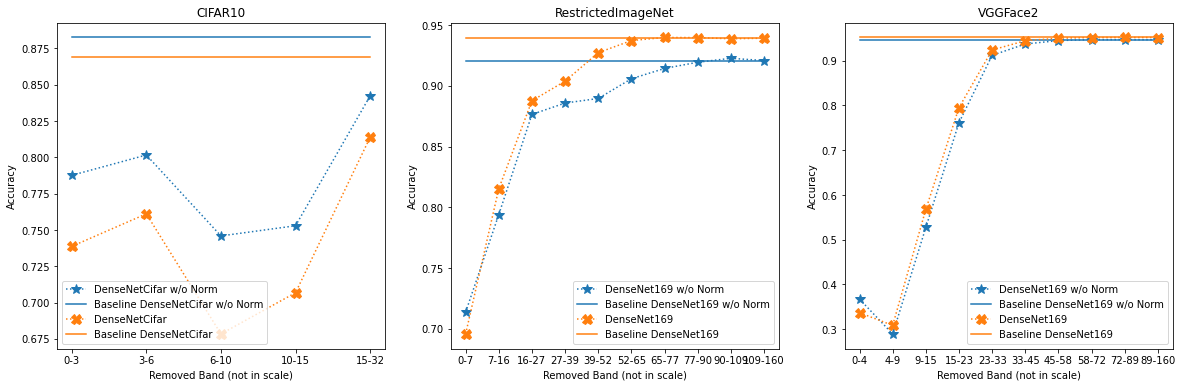

In [22]:
dense_vggnonorm = pkl.load(open("2020-12-19_VGGFace2_64DenseNet169_NOTNORMALIZED_10_MDA.pkl", "rb"))
dense_vgg = pkl.load(open("2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl", "rb"))

dense_rinnonorm = pkl.load(open("2020-12-22_RestrictedImageNet_64DenseNet169_MDA.pkl", "rb"))
dense_rin = pkl.load(open("2020-11-10_RestrictedImageNet_64DenseNet169_MDA.pkl", "rb"))

densenet_cifar = pkl.load(open('2020-11-23_CIFAR10_128DenseNetCifar_MDA.pkl', 'rb'))
densenet_cifar_normalized = pkl.load(open("2020-11-23_CIFAR10NORMALIZED_128DenseNetCifar_MDA.pkl", "rb"))

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title("CIFAR10")
plot_graph_mda(densenet_cifar, label="DenseNetCifar w/o Norm", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(densenet_cifar_normalized, label="DenseNetCifar", linestyle="dotted", marker="X", markersize=10)
_ = plt.legend(loc="best")

plt.subplot(1, 3, 2)
plt.title("RestrictedImageNet")
plot_graph_mda(dense_rinnonorm, label="DenseNet169 w/o Norm", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(dense_rin, label="DenseNet169", linestyle="dotted", marker="X", markersize=10)
_ = plt.legend(loc="best")

plt.subplot(1, 3, 3)
plt.title("VGGFace2")
plot_graph_mda(dense_vggnonorm, label="DenseNet169 w/o Norm", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(dense_vgg, label="DenseNet169", linestyle="dotted", marker="X", markersize=10)
plt.legend(loc="lower right")

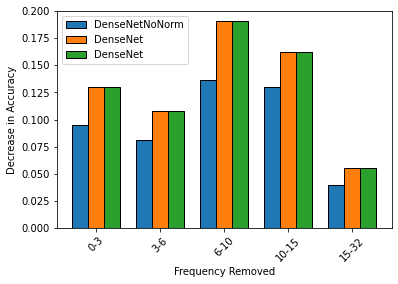

In [15]:
plot_all_bar_imp(densenet_cifar, "DenseNetNoNorm",  densenet_cifar_normalized, "DenseNet", densenet_cifar_normalized, "DenseNet")

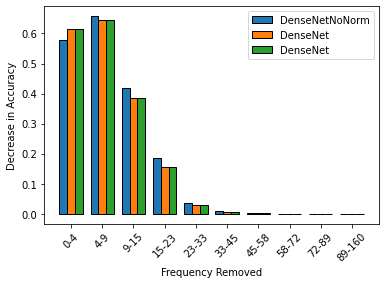

In [16]:
plot_all_bar_imp(dense_vggnonorm, "DenseNetNoNorm",  dense_vgg, "DenseNet", dense_vgg, "DenseNet")

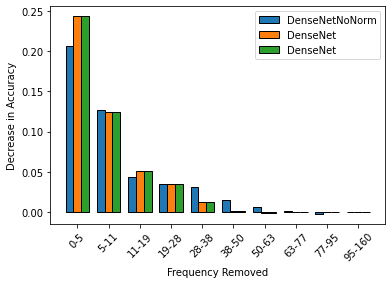

In [17]:
plot_all_bar_imp(dense_rinnonorm, "DenseNetNoNorm",  dense_rin, "DenseNet", dense_rin, "DenseNet")

### VGGFace2 e Profundidade
No VGGFace2 treinamos versões mais e menos profundas das redes para procurar se há alguma relação

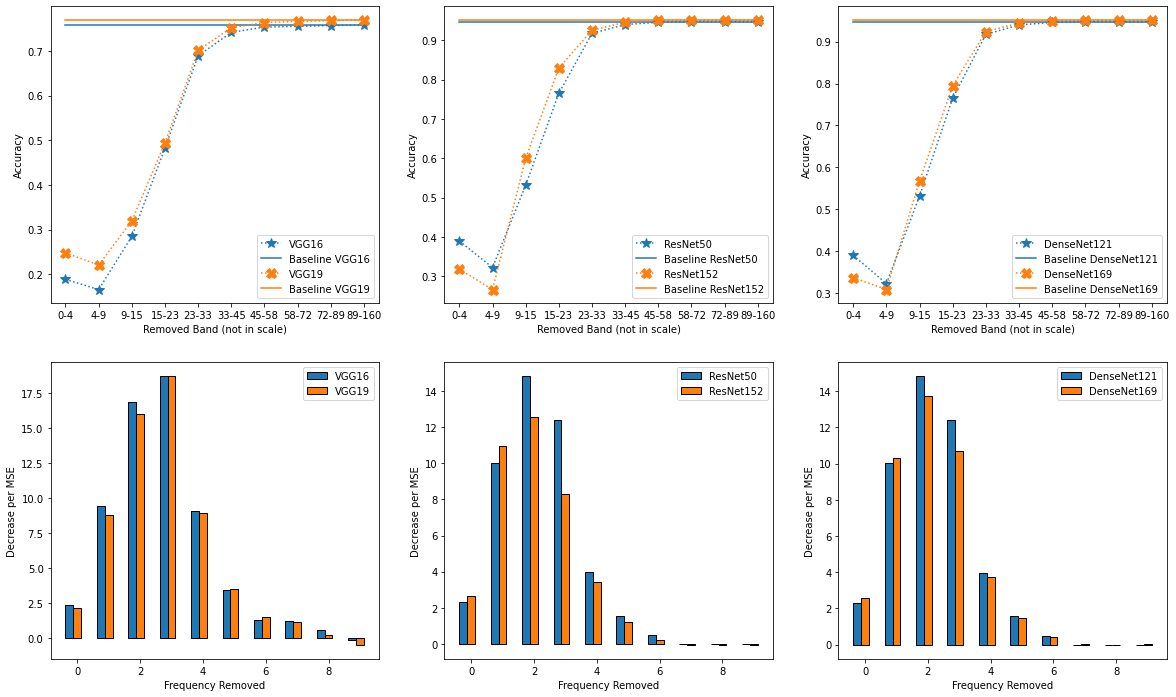

In [20]:
glob.glob("*VGGFace2*")
vgg16_vggface2 = pkl.load(open('2020-11-23_VGGFace2_64VGG16_3_MDA.pkl', 'rb'))
vgg19_vggface2 = pkl.load(open('2020-10-08_VGGFace2_64VGG19_3_MDA.pkl', 'rb'))

resnet50_vggface2 = pkl.load(open("2020-12-11_VGGFace2_64DenseNet121_10_MDA.pkl", "rb"))
resnet152_vggface2 = pkl.load(open("2020-10-24_VGGFace2_642020-10-18_VGGFace2_64ResNet152_6_4_MDA.pkl", "rb"))

densenet121_vggface2 = pkl.load(open('2020-12-11_VGGFace2_64DenseNet121_10_MDA.pkl', 'rb'))
densenet169_vggface2 = pkl.load(open('2020-11-10_VGGFace2_64DenseNet169_10_MDA.pkl', 'rb'))


plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plot_graph_mda(vgg16_vggface2, label="VGG16", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(vgg19_vggface2, label="VGG19", linestyle="dotted", marker="X", markersize=10)
plt.legend()

plt.subplot(2, 3, 4)
plot_all_bar_2impmse_ratio(vgg16_vggface2, vgg_examples, "VGG16", vgg19_vggface2, vgg_examples, "VGG19")
plt.legend()

plt.subplot(2, 3, 2)
plot_graph_mda(resnet50_vggface2, label="ResNet50", linestyle="dotted", marker="*", markersize=10,)
plot_graph_mda(resnet152_vggface2, label="ResNet152", linestyle="dotted", marker="X", markersize=10,)
plt.legend()

plt.subplot(2, 3, 5)
plot_all_bar_2impmse_ratio(resnet50_vggface2, vgg_examples, "ResNet50",resnet152_vggface2, vgg_examples,  "ResNet152")
plt.legend()

plt.subplot(2, 3, 3)
plot_graph_mda(densenet121_vggface2, label="DenseNet121", linestyle="dotted", marker="*", markersize=10)
plot_graph_mda(densenet169_vggface2, label="DenseNet169", linestyle="dotted", marker="X", markersize=10)
plt.legend()

plt.subplot(2, 3, 6)
plot_all_bar_2impmse_ratio(densenet121_vggface2, vgg_examples, "DenseNet121", densenet169_vggface2, vgg_examples, "DenseNet169")
plt.legend()

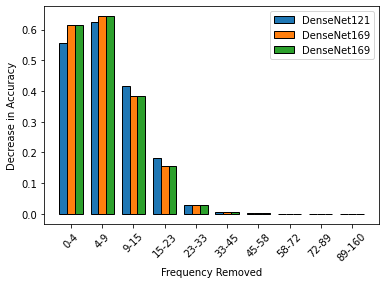

In [19]:
plot_all_bar_imp(densenet121_vggface2, "DenseNet121", densenet169_vggface2, "DenseNet169", densenet169_vggface2, "DenseNet169")

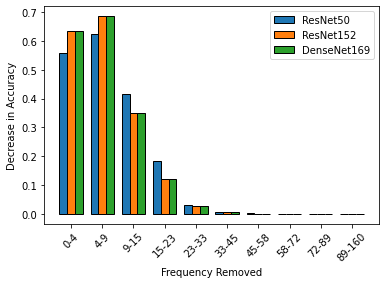

In [20]:
plot_all_bar_imp(resnet50_vggface2, "ResNet50", resnet152_vggface2, "ResNet152", resnet152_vggface2, "DenseNet169")